In [50]:
# import numpy, pandas, networkx, causallearn, castle
import numpy as np
import pandas as pd
import networkx as nx
import causallearn
import castle
import pydot

from itertools import combinations
from clustcausal.clusterdag.cluster_dag import CDAG
from causallearn.graph.GraphClass import CausalGraph
from causallearn.utils.PCUtils.BackgroundKnowledge import BackgroundKnowledge

In [93]:
class CDAG:
    """
    Class for functionality regarding CDAGS

    attributes:
        clusters: dictionary of clusters
        cluster_edges: list of tuples of cluster edges
        graph: CausalGraph object
        background_knowledge: BackgroundKnowledge object
        node_names: list of node names
        node_indices: dictionary that points to which cluster the node is in
    
    methods:
        cdag_to_mpdag: constructs a MPDAG from a CDAG

    """
    def __init__(self, cluster_mapping: dict, 
        cluster_edges: list):
        """
        Construct a CDAG object from a cluster dictionary
        The CDAG is stored as a dictionary. 
        The cluster_nodes are stored as a dictionary pointing 
        to a list of cluster members. 
        The cluster_edges are stored as a list of tuples.
        An example CDAG:
            cdag = {}
            cdag['clusters'] = {'C1':['X1','X2','X3'], 'C2': ['X4','X5']}
            cdag['cluster_edges'] = [('C1','C2')] 
        """
        self.clusters = cluster_mapping
        self.cluster_edges = cluster_edges
        self.node_names = []
        for cluster in self.clusters:
            self.node_names.extend(self.clusters[cluster])
        self.node_indices = {} # Dictionary that points to which cluster the node is in
        for node in self.node_names:
            for cluster, vertice in self.clusters.items():
                if node in vertice:
                    self.node_indices[node] = cluster
        

    def cdag_to_mpdag(self):
        """
        Constructs a MPDAG from a CDAG and stores it in a causallearn
        BackgroundKnowledge object. 
        """
        # Create the list of node_names needed for CausalGraph
        self.graph = CausalGraph(no_of_var = len(self.node_names), 
                                                      node_names = self.node_names)
        # Remove edges that are forbidden by the CDAG
        self.background_knowledge = BackgroundKnowledge()
        for cluster1, cluster2 in list(combinations(self.clusters.keys(),2)):
            if (cluster1, cluster2) not in self.cluster_edges:
                # Remove all edges from nodes in cluster1 to nodes in cluster2
                for node1, node2 in list(combinations(self.graph.node_map,2)):
                    self.graph.G.remove_edge(node1, node2)
                    print('removed edge: ', node1, node2)
            if (cluster2, cluster1) not in self.cluster_edges:
                # Remove all edges from nodes in cluster2 to nodes in cluster1
                for node2 in self.clusters[cluster2]:
                    for node1 in self.clusters[cluster1]:
                        self.graph.G.remove_edge()
                # for node2, node1 in list(combinations(self.graph.node_map,2)):
                #     self.graph.G.remove_edge(node2, node1)
                #     print('removed edge: ', node2, node1)
            # if (cluster2, cluster1) not in self.cluster_edges:
            #     # Remove all edges from nodes in cluster2 to nodes in cluster1
            #     for node2, node1 in zip(self.clusters[cluster2], self.clusters[cluster1]):
            #         self.background_knowledge.add_forbidden_by_node(node2, node1)

In [94]:
cluster_dict = {}
cluster_dict['clusters'] = {'C1':['X1','X2','X3'], 'C2': ['X4','X5']}
cluster_dict['cluster_edges'] = [('C1','C2')] 
cdag = CDAG(cluster_mapping=cluster_dict['clusters'], cluster_edges = cluster_dict['cluster_edges'])

In [106]:
edges = cdag.graph.G.get_graph_edges()
edge = edges[0]
edge.get_node1().get_name()

'X1'

In [95]:
cdag.cdag_to_mpdag()

TypeError: GeneralGraph.remove_edge() takes 2 positional arguments but 3 were given

In [89]:
for i,j in zip(cdag.clusters['C1'], cdag.clusters['C2']):
    print(i,j)

X1 X4
X2 X5


In [85]:
print(cdag.clusters)
print(cdag.cluster_edges)
print(cdag.node_indices)

{'C1': ['X1', 'X2', 'X3'], 'C2': ['X4', 'X5']}
[('C1', 'C2')]
{'X1': 'C1', 'X2': 'C1', 'X3': 'C1', 'X4': 'C2', 'X5': 'C2'}


In [81]:
for cluster1, cluster2 in list(combinations(cdag.clusters.keys(),2)):
    print(cluster1, cluster2)

C1 C2


In [82]:
print(('C1', 'C2') in cdag.cluster_edges)
print(('C2', 'C1') in cdag.cluster_edges)

True
False


In [84]:
cdag.cdag_to_mpdag()

AttributeError: 'CausalGraph' object has no attribute 'node_map'

In [63]:
cdag.graph.G.get_node_names()

['X1', 'X2', 'X3', 'X4', 'X5']

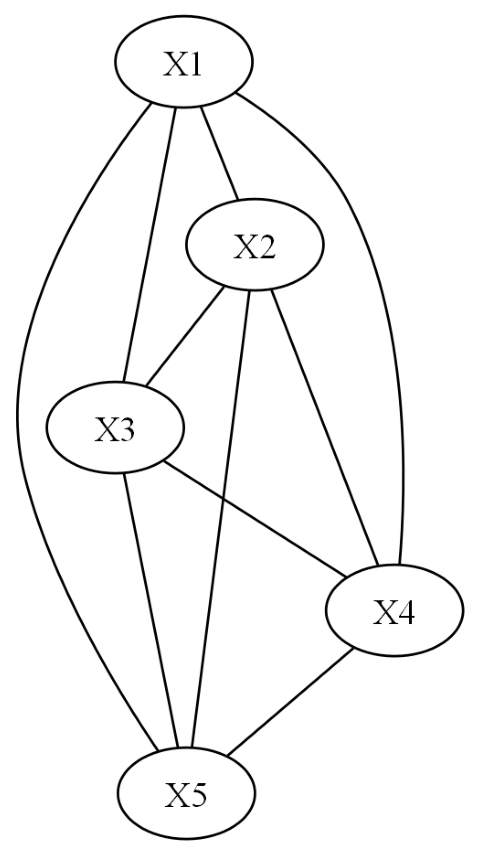

In [64]:
cdag.graph.draw_pydot_graph()